## **Trabajo Semanal N°1**


# **Sintesis de señales**

 **Federico Dunel**


## introduccion
En el siguiente trabajo se comenzó a programar en python funciones armonicas senoidales y pulsos y señales cuadradas. Luego se probaron distintas operaciones sobre las funciones:
* Ortogonalidad: $\sum _{n=0}^{N} x\left[n\right]\cdot y\left[n\right]$ (*ec. 1*)
* Correlatividad:  $\sum _{n=0}^{N} x\left[n\right]\cdot y\left[n+N\right]$ (*ec. 2*)
* Energía de una señal: $\sum _{n=0}^{N} {\left|x\left[n\right]\right|}^{2}$ (*ec. 3*)

Se verificaron la ortogonalidad, correlacion y energía entre la primera funcion senoidal y el resto.
También se probó la siguiente identidad trigonometrica entre las funciones senoidales:


*   $2 \cdot \sin(\alpha)\cdot \sin(\beta) = \cos(\alpha - \beta) - \cos(\alpha + \beta)$ (*ec. 4*)


## Desarrollo y Analisis de resultados

En python se definieron dos funciones para realizar señales, una produce ondas senoidales a partir de un valor de amplitud, frecuencia, fase, número de muestras y frecuencia de muestreo. El intervalo de tiempo entre muestras esta dado por la division de n muestras sobre la frecuencia de muestreo, en todas las funciones se utilizaron N = 1000 muestras con una frecuencia de muestreo de fs = 100000Hz, dando un intervalo de tiempo de analisis de 0.01s. De esta manera se puede apreciar la forma de las funciones al ser graficadas. La otra funcion que se definio produce ondas cuadradas utilizando los mismos parametros que la funcion senoidal sumandole un parametro para definir los duty cicles del pulso. Para realizar un pulso de 10ms se utilizo una funcion cuadrada con una frecuencia de 20Hz (un periodo de 0.05s) con un duty cicle de 0.2, dando una sucesion de pulsos de 10ms. 

**1) Definicion de funciones**


In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def funsen(ff, nn, fs, amp = 1, dc = 0, ph = 0): #amp, amplitud; dc, desplazamiento; ff, frecuencia
                                #ph, diferencia de fase en rad; nn muestras; fs, frec de muestreo
    n=np.arange(nn)
    t=n/fs
    x= dc + amp*np.sin(2*np.pi*ff*t+ph)
    
    
    return t,x
def funsen_lim(ff, nn, fs, amp = 1, dc = 0, ph = 0, limite=None):
    tt = np.arange(0, nn/fs, 1/fs)   # vector de tiempo
    xx = dc + amp * np.sin(2*np.pi*ff*tt + ph)

    if limite is not None:
        xx = np.clip(xx, -limite, limite)  # restringe a [-limite, +limite]

    return tt, xx

def funpulso (ff, nn, fs, amp = 1, dc = 0, ph = 0, duty = 0.5):
    n=np.arange(nn)
    t=n/fs
    x = dc + amp * signal.square(2 * np.pi * ff * t + ph, duty=duty)
    
    return t,x


Fs = 100000
N = 1000


**2) Parametros de las señales**

In [3]:
tt,aa=funsen(ff = 2000, nn = N, fs = Fs)

tt,xx=funsen(ff = 2000, nn = N, fs = Fs, ph = np.pi/2)

tt,aux=funsen(ff = 1000, nn = N, fs = Fs)
mod=xx*aux

tt,pp=funsen_lim(ff = 2000, nn = N, fs = Fs, limite = 0.75)

tt,cc=funpulso(ff = 50, nn = N, fs = Fs, amp = 1.0, duty = 0.5)

tt,dd=funpulso(ff = 4000, nn = N, fs = Fs, duty = 0.5)


**3) Gráficos de señales**

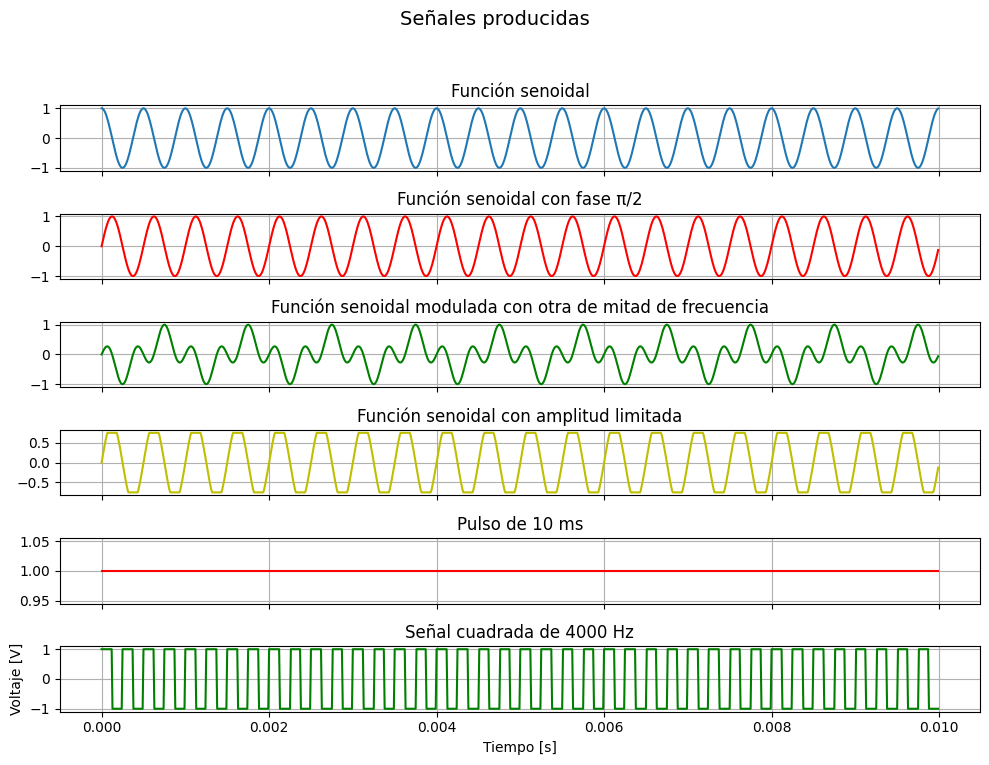

In [4]:
fig, axs = plt.subplots(6, 1, figsize=(10, 8), sharex=True)

axs[0].plot(tt, xx)
axs[0].set_title("Función senoidal")
axs[0].grid()

axs[1].plot(tt, aa, 'r')
axs[1].set_title("Función senoidal con fase π/2")
axs[1].grid()

axs[2].plot(tt, mod, 'g')
axs[2].set_title("Función senoidal modulada con otra de mitad de frecuencia")
axs[2].grid()

axs[3].plot(tt, pp, 'y')
axs[3].set_title("Función senoidal con amplitud limitada")
axs[3].grid()

axs[4].plot(tt, cc, 'r')
axs[4].set_title("Pulso de 10 ms")
axs[4].grid()

axs[5].plot(tt, dd, 'g')
axs[5].set_title("Señal cuadrada de 4000 Hz")
axs[5].grid()

fig.suptitle("Señales producidas", fontsize=14)
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # deja espacio al título general
plt.show()

**4) Graficos de correlacion de funciones**

Se utilizó la funcion correlate del paquete de funciones signal de la libreria scipy de python entre las funciones generadas

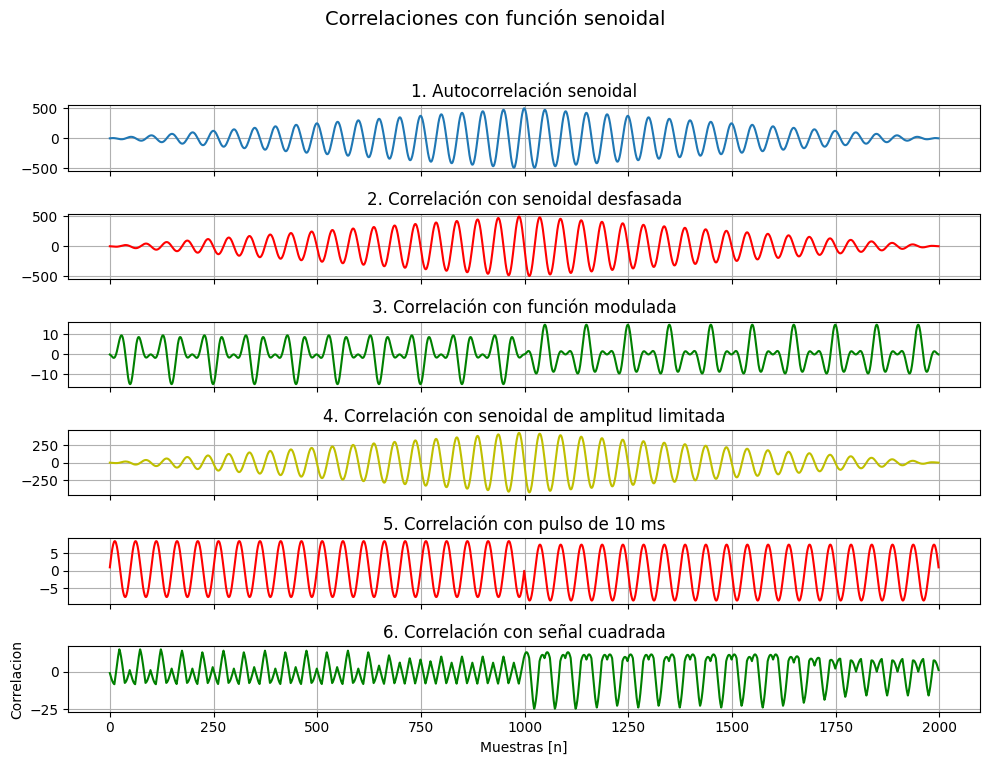

In [6]:
fig2, axs = plt.subplots(6, 1, figsize=(10, 8), sharex=True)

cxx = signal.correlate(xx, xx)
caa = signal.correlate(xx, aa)
cmod = signal.correlate(xx, mod)
cpp = signal.correlate(xx, pp)
ccc = signal.correlate(xx, cc)
ddn = signal.correlate(xx, dd)

axs[0].plot(cxx)
axs[0].set_title("1. Autocorrelación senoidal")
axs[0].grid()


axs[1].plot(caa, 'r')
axs[1].set_title("2. Correlación con senoidal desfasada")
axs[1].grid()

axs[2].plot(cmod, 'g')
axs[2].set_title("3. Correlación con función modulada")
axs[2].grid()

axs[3].plot(cpp, 'y')
axs[3].set_title("4. Correlación con senoidal de amplitud limitada")
axs[3].grid()

axs[4].plot(ccc, 'r')
axs[4].set_title("5. Correlación con pulso de 10 ms")
axs[4].grid()

axs[5].plot(ddn, 'g')
axs[5].set_title("6. Correlación con señal cuadrada")
axs[5].grid()

fig2.suptitle("Correlaciones con función senoidal", fontsize=14)
plt.xlabel("Muestras [n]")  
plt.ylabel("Correlacion")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.show()

Los gráficos 1 y 2 son practicamente identicos, esto muestra que el grado de autocorrelacion y de correlacion con la misma función desfasada son muy similares. En el gráfico 3 se puede apreciar lo mismo pero con menor amplitud. Luego se puede apreciar que la correlación entre la función senoidal y las funciones modulada y cuadradas son muy bajos en comparación con los anteriores, tiene sentido ya que sus frecuencias son distintas a los 2000Hz de la función senoidal original.

**5) Ortogonalidad entre funciones**

In [9]:
def producto_interno(x, y):
    
    return np.sum(x * y)

def ortogonalidad(x, y, tol=1e-6):
    
    return abs(producto_interno(x, y)) < tol

print("Producto interno senoidal-fase π/2:", producto_interno(xx, aa))
print("Ortogonales?:", ortogonalidad(xx, aa))

print("Producto interno senoidal-senoidal amplitud limitada:", producto_interno(xx, pp))
print("Ortogonales?:", ortogonalidad(xx, pp))

print("Producto interno senoidal-señal modulada:", producto_interno(xx, mod))
print("Ortogonales?:", ortogonalidad(xx, mod))

print("Producto interno senoidal y cuadrada:", producto_interno(xx, dd))
print("Ortogonales?:", ortogonalidad(xx, dd))

print("Producto interno senoidal y pulso 10ms:", producto_interno(xx, cc))
print("Ortogonales?:", ortogonalidad(xx, cc))


Producto interno senoidal-fase π/2: 1.135314064981685e-12
Ortogonales?: True
Producto interno senoidal-senoidal amplitud limitada: 3.276934279483612e-12
Ortogonales?: True
Producto interno senoidal-señal modulada: -5.5067062021407764e-14
Ortogonales?: True
Producto interno senoidal y cuadrada: 9.999999999999753
Ortogonales?: False
Producto interno senoidal y pulso 10ms: -4.263256414560601e-14
Ortogonales?: True


Para verificar la ortogonalidad primero se realizó la sumatoria de la multiplicación de cada componente de los vectores que resultaron de las funciones anteriores. Si este valor es menor a 1e-6 entonces se consideró nula, esto se hizo así ya que el resultado de las sumatorias nunca era exactamente 0. La única función no ortogonal con la senoidal resultó ser la cuadrada.

## **Concluciones**

En este trabajo se pudo representar gráficamente distintas funciones senoidales y cuadradas programando en python. También se verificaron ciertas propiedades de las señales y se realizaron operaciones matematicas entre ellas. Se pudieron probaron las limitaciones de representar señales con la computadora y discretizando señales, por ejemplo, cuando ciertos valores deberían ser nulos el programa los considera como valores muy pequeños.


## Analisis del aprendizaje
Resolví la tarea con seguridad, aunque me estoy terminando de familiarizar con las herramientas de trabajo. Aprendí a programar python y como funcionan correctamente las funciones de las librerias. Usé chatgpt para ordenar los gráficos y encontrar algunos errores en el código.